<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [55]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

def crossEntropyLoss(y_true, y_pred):
  loss = -y_true * np.log(y_pred + 1e-15)
  return np.sum(loss) / len(y_true)

def targetsSearch(data):
  predict = NN.feedforward(data)
  return [np.argmax(item) for item in predict.T]

In [56]:
class NeuralNetwork:

  def __init__(self, k):

    self.k = k

    self.loss = list()
  
  def feedforward(self, data):
    y = softmax(self.k @ data)
    return y
  
  def train(self, data, y_true):
    alpha = 0.0001
    epochs = 2000

    for epoch in tqdm(range(epochs)):

      """backprop"""

      predict = self.feedforward(data)

      dL_dk = (predict - y_true) @ data.T

      self.k -= alpha * dL_dk

      self.loss.append(crossEntropyLoss(y_true.T, predict.T))

In [ ]:
kParameters = np.zeros((10, 256))
NN = NeuralNetwork(kParameters)
NN.train(trainInputs, trainTargets)


In [58]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [59]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

93.1


[[92, 1, 0, 0, 1, 1, 1, 1, 3, 0],
 [1, 97, 0, 0, 0, 0, 0, 0, 2, 0],
 [1, 1, 91, 1, 0, 0, 3, 0, 3, 0],
 [2, 0, 1, 90, 0, 4, 0, 0, 2, 1],
 [0, 1, 1, 0, 90, 0, 2, 0, 0, 6],
 [1, 1, 1, 4, 0, 91, 0, 0, 2, 0],
 [3, 0, 0, 0, 2, 1, 94, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 98, 0, 2],
 [0, 1, 1, 2, 0, 1, 0, 1, 94, 0],
 [0, 1, 1, 0, 2, 0, 0, 1, 1, 94]]

In [60]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

94.4


[[95, 0, 0, 0, 2, 0, 2, 0, 1, 0],
 [0, 98, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 1, 94, 2, 0, 1, 0, 0, 2, 0],
 [0, 0, 2, 90, 0, 6, 0, 0, 2, 0],
 [0, 0, 0, 0, 95, 0, 5, 0, 0, 0],
 [2, 1, 2, 2, 0, 89, 1, 1, 2, 0],
 [2, 1, 2, 0, 2, 0, 93, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 97, 0, 3],
 [0, 2, 0, 0, 0, 1, 0, 1, 96, 0],
 [0, 0, 0, 2, 1, 0, 0, 0, 0, 97]]

In [61]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

873.5


[[888, 2, 1, 0, 4, 1, 2, 0, 2, 0],
 [1, 881, 1, 5, 2, 0, 1, 1, 8, 0],
 [1, 5, 856, 4, 4, 6, 10, 2, 10, 2],
 [0, 0, 13, 858, 0, 15, 0, 3, 7, 4],
 [0, 5, 1, 0, 882, 0, 4, 1, 0, 7],
 [6, 0, 3, 14, 1, 860, 4, 2, 8, 2],
 [2, 3, 2, 0, 6, 1, 886, 0, 0, 0],
 [0, 2, 0, 1, 1, 0, 0, 885, 0, 11],
 [2, 8, 3, 5, 1, 14, 2, 2, 860, 3],
 [1, 1, 0, 0, 6, 0, 0, 11, 2, 879]]

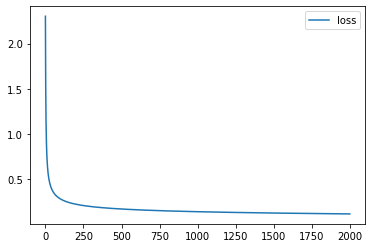

In [62]:
plt.plot(NN.loss, label='loss')
plt.legend()